In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import sklearn

In [251]:
def cluster(dpath,n_clusters):
    df=pd.read_excel(dpath)
    df.drop(0,axis=0,inplace=True)
    #df.drop(['Unique ID'],axis=1,inplace=True)
    cols=[ 'Age', 'BCLOT', 'A/G RAT', 'DBIL', 'IBIL',
        'TBIL', 'TGLO', 'TREP', 'ALB', 'GGT', 'SGOT', 'SGPT','ALKPO4']
    for col in cols:
        df[col]= df[col].apply(pd.to_numeric)
    meanAge=df['Age'].mean()
    df['Age'].fillna(value=meanAge,inplace=True)
   
    df.drop(['Age','DBIL','IBIL','TREP','A/G RAT','Gender'],axis=1,inplace=True)
    transformed_df = pd.DataFrame(StandardScaler().fit_transform(df))
    header=pd.DataFrame(df.columns)
    transformed_df.columns=header
    kmeans = KMeans(init="random", n_clusters=n_clusters, random_state=1)
    kmeans.fit(transformed_df)
    
    clusters = kmeans.predict(transformed_df)
    sse=kmeans.inertia_
    transformed_df["Cluster"] = clusters
    plotX = pd.DataFrame(np.array(transformed_df))

#Rename plotX's columns since it was briefly converted to an np.array above
    plotX.columns = transformed_df.columns
    pca_1d = PCA(n_components=1)

#PCA with two principal components
    pca_2d = PCA(n_components=2)

    #PCA with three principal components
    pca_3d = PCA(n_components=3)
    PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
    PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

    #And this DataFrame contains three principal components that will aid us
    #in visualizing our clusters in 3-D
    PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))
    PCs_1d.columns = ["PC1_1d"]
#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
    PCs_2d.columns = ["PC1_2d", "PC2_2d"]
    PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]
    fig = plt.figure()
    axes = fig.add_subplot(projection = '3d')
    colors=['Red','Green','Blue','Black','Yellow','Purple']
    axes.scatter(PCs_3d['PC1_3d'], PCs_3d['PC2_3d'],PCs_3d['PC3_3d'],c=[colors[i] for i in clusters])
    plt.show()
    unique, counts = np.unique(clusters, return_counts=True)
    print(counts)
    return clusters,sse
    

c:\Users\delwy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


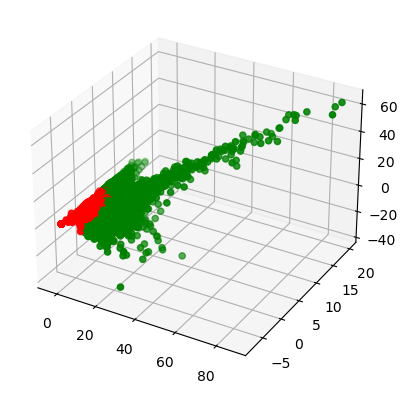

[317794  13772]


In [252]:
clusters,sse=cluster('dataset.xlsx',2)

In [253]:
sse

2695484.561498063

In [254]:
def save_cluster(clusters,cluster_id,dpath):
    df=pd.read_excel(dpath)
    df.drop(0,axis=0,inplace=True)
    cols=[ 'Age', 'BCLOT', 'A/G RAT', 'DBIL', 'IBIL',
            'TBIL', 'TGLO', 'TREP', 'ALB', 'GGT', 'SGOT', 'SGPT','ALKPO4']
    for col in cols:
            df[col]= df[col].apply(pd.to_numeric)
    meanAge=df['Age'].mean()
    df['Age'].fillna(value=meanAge,inplace=True)
    g_id=np.argwhere(clusters==cluster_id)
    
    df_new=df.take(g_id[:,0])
    return df_new

c:\Users\delwy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


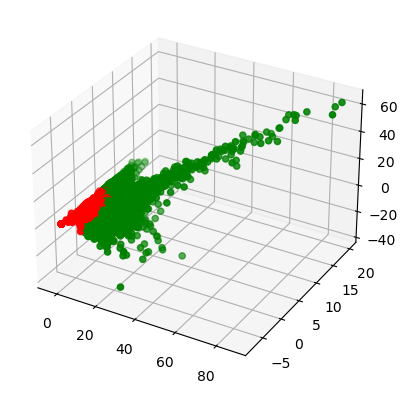

[317794  13772]


In [256]:
na_clusters,sse=cluster('dataset.xlsx',2)


In [238]:
na_df0=save_cluster(na_clusters,0,'dataset.xlsx')

In [239]:
na_df0.describe()
na_df0.to_excel('normals.xlsx')

In [240]:
na_df1=save_cluster(na_clusters,1,'dataset.xlsx')

In [241]:
na_df1.describe()
na_df1.to_excel('abnormals.xlsx')

c:\Users\delwy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


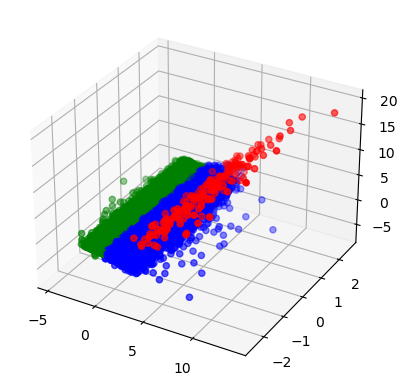

[ 182 7398 6191]


In [143]:
abnormal_clusters=cluster('abnormals.xlsx',3)

In [147]:
abnormal1_df=save_cluster(abnormal_clusters,0,'abnormals.xlsx')
abnormal1_df.describe()

[[   51]
 [  114]
 [  321]
 [  384]
 [  439]
 [  524]
 [  525]
 [  533]
 [  554]
 [  569]
 [  662]
 [  768]
 [  930]
 [  950]
 [  998]
 [ 1080]
 [ 1158]
 [ 1179]
 [ 1189]
 [ 1202]
 [ 1303]
 [ 1361]
 [ 1594]
 [ 1609]
 [ 1664]
 [ 1740]
 [ 1887]
 [ 2041]
 [ 2043]
 [ 2068]
 [ 2083]
 [ 2144]
 [ 2218]
 [ 2285]
 [ 2563]
 [ 2722]
 [ 2746]
 [ 2769]
 [ 2779]
 [ 2845]
 [ 2864]
 [ 2888]
 [ 2944]
 [ 2975]
 [ 3062]
 [ 3171]
 [ 3204]
 [ 3427]
 [ 3462]
 [ 3491]
 [ 3532]
 [ 3690]
 [ 3791]
 [ 3798]
 [ 3903]
 [ 3931]
 [ 4003]
 [ 4134]
 [ 4136]
 [ 4196]
 [ 4318]
 [ 4411]
 [ 4488]
 [ 4522]
 [ 4586]
 [ 4601]
 [ 4663]
 [ 4815]
 [ 5101]
 [ 5155]
 [ 5294]
 [ 5341]
 [ 5361]
 [ 5415]
 [ 5505]
 [ 5538]
 [ 5562]
 [ 5818]
 [ 6007]
 [ 6200]
 [ 6201]
 [ 6257]
 [ 6542]
 [ 6732]
 [ 6822]
 [ 6896]
 [ 6933]
 [ 7048]
 [ 7051]
 [ 7087]
 [ 7193]
 [ 7227]
 [ 7252]
 [ 7259]
 [ 7280]
 [ 7281]
 [ 7294]
 [ 7305]
 [ 7320]
 [ 7326]
 [ 7460]
 [ 7524]
 [ 7611]
 [ 7674]
 [ 7706]
 [ 7783]
 [ 7792]
 [ 7808]
 [ 7913]
 [ 8075]
 [ 8105]
 

,Unnamed: 0,Unique ID,Age,BCLOT,A/G RAT,DBIL,IBIL,TBIL,TGLO,TREP,ALB,GGT,SGOT,SGPT,ALKPO4
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,160783.851648,160785.203297,28.895604,114.876429,1.556648,4.133626,1.337363,5.470440,2.470989,5.870934,3.398626,135.409341,2753.023077,2008.333407,228.152747
std,93761.918260,93762.680442,23.466329,54.582762,0.774737,4.059359,1.611352,4.946504,0.819180,1.261043,0.663046,117.722404,1808.727919,942.041910,154.984974
min,1605.000000,1605.000000,0.000000,41.500000,0.700000,0.100000,0.100000,0.200000,0.600000,3.000000,1.900000,7.800000,211.000000,443.800000,35.900000
25%,76774.500000,76774.500000,8.250000,75.600000,1.162500,1.025000,0.400000,1.800000,1.912500,5.025000,2.800000,54.250000,1453.275000,1357.050000,126.575000
50%,172774.500000,172776.500000,24.500000,107.000000,1.375000,3.400000,1.000000,4.415000,2.400000,5.800000,3.460000,96.900000,2121.650000,1792.450000,190.800000
75%,233999.750000,234001.750000,45.000000,139.500000,1.700000,5.767500,1.872500,7.307500,3.007500,6.937500,3.900000,173.375000,3593.100000,2556.200000,285.000000
max,329623.000000,329625.000000,93.000000,352.000000,6.170000,22.600000,15.600000,24.500000,4.800000,8.800000,4.890000,645.600000,9889.500000,5005.000000,1028.300000


In [149]:
abnormal2_df=save_cluster(abnormal_clusters,1,'abnormals.xlsx')
abnormal2_df.describe()

,Unnamed: 0,Unique ID,Age,BCLOT,A/G RAT,DBIL,IBIL,TBIL,TGLO,TREP,ALB,GGT,SGOT,SGPT,ALKPO4
count,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000
mean,166212.319951,166213.716680,50.207894,363.927372,1.355620,0.331638,0.462841,0.795569,3.275488,7.596341,8.216968,39.749202,30.298459,37.706448,84.869640
std,96065.142984,96065.870363,15.444556,99.245742,0.259835,0.228306,0.378069,0.463423,0.519618,0.732038,1.316198,47.858643,25.017290,28.414841,33.491233
min,144.000000,144.000000,0.000000,27.000000,0.300000,0.000000,0.000000,0.100000,1.200000,3.900000,1.800000,0.000000,0.000000,0.000000,0.000000
25%,82376.500000,82376.500000,38.000000,304.000000,1.190000,0.200000,0.250000,0.520000,3.000000,7.200000,8.000000,18.000000,20.000000,23.000000,65.000000
50%,166365.000000,166367.000000,50.000000,362.000000,1.320000,0.310000,0.390000,0.700000,3.200000,7.500000,8.400000,25.000000,25.000000,30.000000,79.000000
75%,250086.500000,250088.500000,62.000000,420.000000,1.470000,0.410000,0.580000,0.910000,3.500000,7.900000,9.000000,40.000000,32.000000,42.000000,96.000000
max,331551.000000,331553.000000,98.000000,1594.000000,3.720000,8.390000,8.920000,9.700000,11.800000,18.800000,15.600000,774.000000,668.000000,355.000000,600.000000


In [150]:
abnormal3_df=save_cluster(abnormal_clusters,2,'abnormals.xlsx')
abnormal3_df.describe()

,Unnamed: 0,Unique ID,Age,BCLOT,A/G RAT,DBIL,IBIL,TBIL,TGLO,TREP,ALB,GGT,SGOT,SGPT,ALKPO4
count,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000
mean,164997.511064,164998.906639,42.227104,185.203972,1.330737,2.533337,1.693124,4.225545,3.108792,6.889658,3.803812,350.893986,170.769283,154.032762,275.075689
std,95170.430356,95171.150235,20.843384,74.735097,0.630251,4.030638,3.108114,5.613357,0.840205,1.080570,0.807906,347.050477,206.281817,190.899990,216.908036
min,124.000000,124.000000,0.000000,36.000000,0.290000,0.000000,0.000000,0.150000,0.200000,2.000000,1.300000,0.000000,0.000000,0.000000,0.000000
25%,83818.000000,83818.000000,31.000000,135.850000,1.000000,0.360000,0.380000,0.850000,2.590000,6.200000,3.295000,135.000000,56.800000,43.000000,132.000000
50%,163429.000000,163431.000000,43.000000,176.800000,1.290000,0.800000,0.680000,1.790000,3.040000,7.060000,3.900000,267.000000,101.000000,84.800000,206.000000
75%,247271.000000,247273.000000,57.000000,224.800000,1.580000,2.740000,1.500000,5.195000,3.580000,7.600000,4.400000,447.000000,192.000000,182.000000,345.000000
max,331517.000000,331519.000000,98.000000,704.000000,22.000000,29.800000,33.260000,35.000000,9.500000,17.200000,9.000000,5908.700000,2228.100000,1869.000000,4009.000000


In [151]:
abnormal3_df.to_excel('cholestasis.xlsx')
abnormal2_df.to_excel('synthetic.xlsx')
abnormal1_df.to_excel('hepatocellular.xlsx')

c:\Users\delwy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


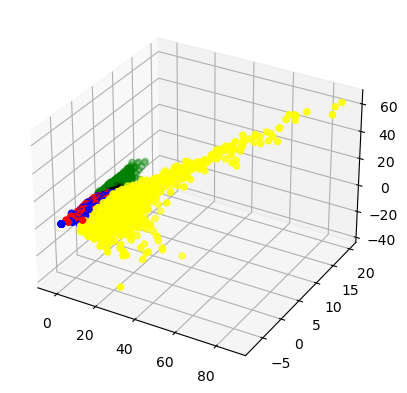

[132010   6992 131613  57140   3811]


In [154]:
clusters=cluster('dataset.xlsx',5)

In [265]:
def classify(tuple):
    transformed_df = StandardScaler().fit_transform(tuple)
    return transformed_df


In [271]:
df.iloc[0].to_numpy()[1:]

array([358. ,   1.2,   3.4,   3.9,  25. ,  26. ,  32. ,  58. ])

In [274]:
df.columns


Index(['Unique ID', 'BCLOT', 'TBIL', 'TGLO', 'ALB', 'GGT', 'SGOT', 'SGPT',
       'ALKPO4'],
      dtype='object')

In [279]:

transformed_df =df.drop(['Unique ID'],axis=1)
transformed_df =pd.DataFrame(StandardScaler().fit_transform(transformed_df))
transformed_df.columns=['BCLOT', 'TBIL', 'TGLO', 'ALB', 'GGT', 'SGOT', 'SGPT',
       'ALKPO4']

In [283]:
def classify(tuple):
    
    kmeans = KMeans(init="random", n_clusters=2, random_state=1)
    kmeans.fit(tuple)
    
    clusters = kmeans.predict(transformed_df)

In [284]:
classify(df.iloc[i].to_numpy())

ValueError: Expected 2D array, got 1D array instead:
array=[3.31568e+05 1.86000e+02 3.20000e-01 2.40000e+00 4.30000e+00 2.50000e+01
 2.70000e+01 2.20000e+01 5.30000e+01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.